<h1>Projeto prático para ingresso no XP Lab</h1>

<ul>
<li>Plot gerado foi salvo como "plot.png".
<li>Arquivo .csv gerado foi salvo como "dataframe.csv".
<li>Ambos estão no mesmo local desse código-fonte.
</ul>

<h3>Importando bibliotecas</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h3>Importando dataframes</h3>

In [2]:
dados_saida = pd.read_csv('dados_saida.csv')
df1 = pd.read_excel('dados.xlsx', sheet_name = 'realizado', index_col = 0, header = None)
df2 = pd.read_excel('dados.xlsx', sheet_name = 'orcado')

<h3>Tabela 'realizado' do excel</h3>

In [3]:
df1

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
NaN,Mes_1,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
NaN,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
Realizado,240,280,200,310,230,213,239,210,210,210,232,213


<h3>Transposição de linhas e colunas da tabela 'realizado'</h3>

In [4]:
df1 = df1.transpose()
df1

,nan,nan,Realizado
1,Mes_1,janeiro,240
2,Mes_2,fevereiro,280
3,Mes_3,março,200
4,Mes_4,abril,310
5,Mes_5,maio,230
6,Mes_6,junho,213
7,Mes_7,julho,239
8,Mes_8,agosto,210
9,Mes_9,setembro,210
10,Mes_10,outubro,210


<h3>Renomeação de colunas do dataframe transposto</h3>

In [5]:
df1.columns = ['a', 'mês', 'realizado']
df1

,a,mês,realizado
1,Mes_1,janeiro,240
2,Mes_2,fevereiro,280
3,Mes_3,março,200
4,Mes_4,abril,310
5,Mes_5,maio,230
6,Mes_6,junho,213
7,Mes_7,julho,239
8,Mes_8,agosto,210
9,Mes_9,setembro,210
10,Mes_10,outubro,210


<h3>Drop na coluna não utilizada</h3>

In [6]:
df1 = df1.drop('a', 1)
df1

,mês,realizado
1,janeiro,240
2,fevereiro,280
3,março,200
4,abril,310
5,maio,230
6,junho,213
7,julho,239
8,agosto,210
9,setembro,210
10,outubro,210


<h3>Merge dos dois dataframes</h3>

In [7]:
df1 = df2.merge(df1)
df1

,mês,orcado,realizado
0,janeiro,330,240
1,fevereiro,290,280
2,março,230,200
3,abril,321,310
4,maio,283,230
5,junho,291,213
6,julho,193,239
7,agosto,259,210
8,setembro,289,210
9,outubro,230,210


<h3>Criação da coluna 'diff'</h3>

In [8]:
df1.insert(3, 'diff', df1['orcado'] - df1['realizado'])
df1

,mês,orcado,realizado,diff
0,janeiro,330,240,90
1,fevereiro,290,280,10
2,março,230,200,30
3,abril,321,310,11
4,maio,283,230,53
5,junho,291,213,78
6,julho,193,239,-46
7,agosto,259,210,49
8,setembro,289,210,79
9,outubro,230,210,20


<h3>Mostrando dataframe 'dados_saida' para fins de comparação</h3>

In [9]:
dados_saida

,mês,orcado,realizado,diff
0,janeiro,330,240,90
1,fevereiro,290,280,10
2,março,230,200,30
3,abril,321,310,11
4,maio,283,230,53
5,junho,291,213,78
6,julho,193,239,-46
7,agosto,259,210,49
8,setembro,289,210,79
9,outubro,230,210,20


<h3>Geração de plot</h3>

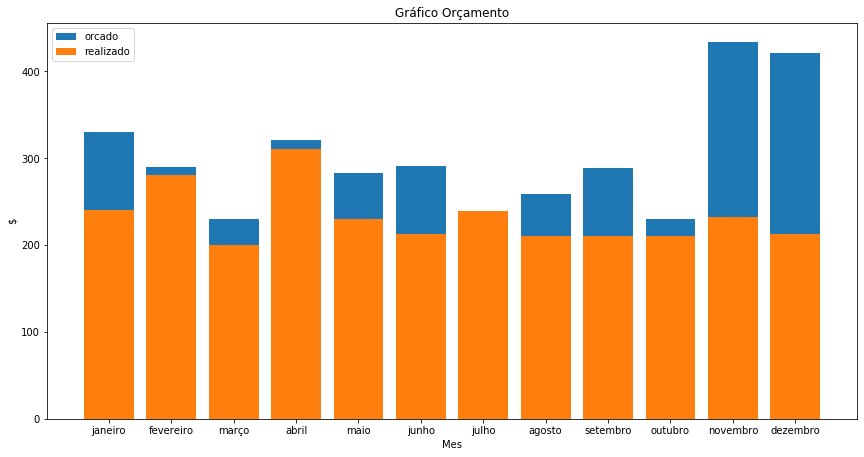

In [18]:
indice = np.arange(len(df1))
p1 = plt.bar(indice, df1['orcado'], 0.8)
p2 = plt.bar(indice, df1['realizado'], 0.8)

plt.ylabel('$')
plt.xlabel('Mes')
plt.title('Gráfico Orçamento')
plt.xticks(indice, df1['mês'])
plt.yticks(np.arange(0, 401, 100))
plt.legend((p1[0], p2[0]), ('orcado', 'realizado'))
plt.subplots_adjust(right=2, top=1.5)

<h3>Exportando tabela trabalhada</h3>

In [22]:
df1.to_csv('dataframe.csv')